In [0]:
import numpy as np
import keras 
from keras import backend as K
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.applications import imagenet_utils

Using TensorFlow backend.


In [0]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt 
%matplotlib inline

In [0]:
train_path="real_and_fake_face/"

In [0]:
train_batches=ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(train_path,target_size=(224,224),batch_size=10)

FileNotFoundError: ignored

In [0]:
mobile_ =keras.applications.mobilenet.MobileNet()












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
17227776/17225924 [==============================] - 1s 0us/step


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
mobile_.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [0]:
x=mobile_.layers[-6].output

In [0]:
predictions=Dense(2,activation='softmax')(x)

In [0]:
model=Model(inputs=mobile_.input,outputs=predictions)

In [0]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [0]:
for layer in model.layers[:-5]:
    layer.trainable=False

In [0]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.fit_generator(train_batches,steps_per_epoch=2,epochs=60,verbose=2)

Epoch 1/60
 - 3s - loss: 0.5008 - acc: 0.7000
Epoch 2/60
 - 2s - loss: 0.4802 - acc: 0.6500
Epoch 3/60
 - 2s - loss: 0.7067 - acc: 0.5500
Epoch 4/60
 - 2s - loss: 0.3358 - acc: 0.8500
Epoch 5/60
 - 2s - loss: 0.3605 - acc: 0.9000
Epoch 6/60
 - 2s - loss: 0.4590 - acc: 0.8000
Epoch 7/60
 - 2s - loss: 0.4761 - acc: 0.7500
Epoch 8/60
 - 2s - loss: 0.5467 - acc: 0.7500
Epoch 9/60
 - 2s - loss: 0.8899 - acc: 0.5000
Epoch 10/60
 - 2s - loss: 0.4014 - acc: 0.8500
Epoch 11/60
 - 2s - loss: 0.4127 - acc: 0.8500
Epoch 12/60
 - 2s - loss: 0.3998 - acc: 0.8500
Epoch 13/60
 - 2s - loss: 0.3539 - acc: 0.8000
Epoch 14/60
 - 2s - loss: 0.5331 - acc: 0.7000
Epoch 15/60
 - 2s - loss: 0.4099 - acc: 0.8000
Epoch 16/60
 - 2s - loss: 0.3650 - acc: 0.8500
Epoch 17/60
 - 2s - loss: 0.3745 - acc: 0.8000
Epoch 18/60
 - 2s - loss: 0.4033 - acc: 0.8000
Epoch 19/60
 - 2s - loss: 0.5355 - acc: 0.6500
Epoch 20/60
 - 2s - loss: 0.2877 - acc: 0.9000
Epoch 21/60
 - 2s - loss: 0.5957 - acc: 0.6000
Epoch 22/60
 - 2s - lo

In [0]:
def prepare_image(file):
    img_path=('testt/')
    img=image.load_img(img_path+file,target_size=(224,224))
    img_array=image.img_to_array(img)
    img_array_expanded_dims=np.expand_dims(img_array,axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

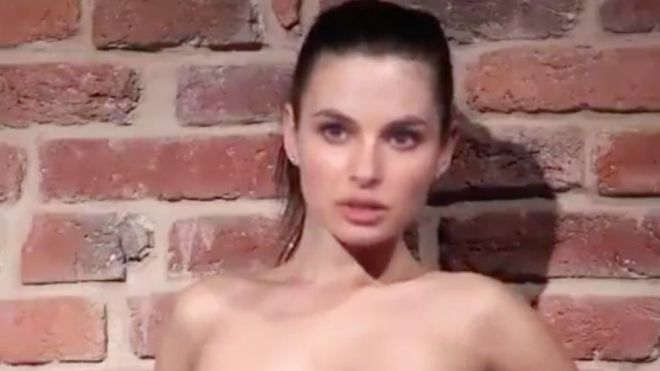

In [26]:
from IPython.display import Image
Image(filename='testt/fte.jpg',width=300,height=200)

In [0]:
preprocessed_image=prepare_image('fte.jpg')

In [0]:
predictions=model.predict(preprocessed_image)

In [31]:
predictions

array([[0.9214225, 0.0785775]], dtype=float32)

In [32]:
results=imagenet_utils.decode_predictions(predictions)

ValueError: ignored

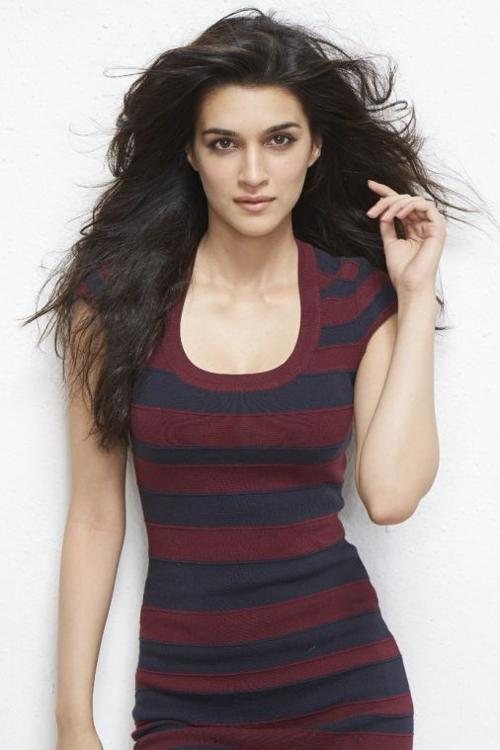

In [36]:
from IPython.display import Image
Image(filename='testt/krt.jpg',width=300,height=200)

In [0]:
preprocessed_image=prepare_image('krt.jpg')

In [0]:
predictions=model.predict(preprocessed_image)

In [39]:
predictions

array([[0.42993447, 0.57006544]], dtype=float32)

In [42]:
predictions[0][0]

0.42993447

In [45]:
if predictions[0][0]>0.5:
  print("fake")
else:
  print("real")

real


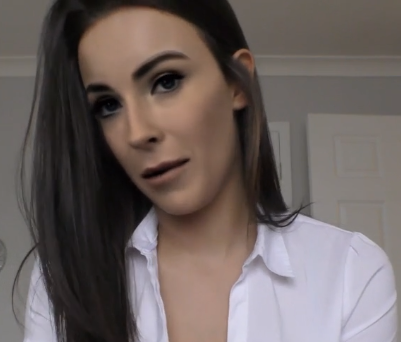

In [46]:
from IPython.display import Image
Image(filename='testt/bridget.jpg',width=300,height=200)

In [0]:
preprocessed_image=prepare_image('bridget.jpg')

In [0]:
predictions=model.predict(preprocessed_image)

In [51]:
print(predictions)
if predictions[0][0]>0.5:
  print("fake")
else:
  print("real")

[[0.78058964 0.2194104 ]]
fake


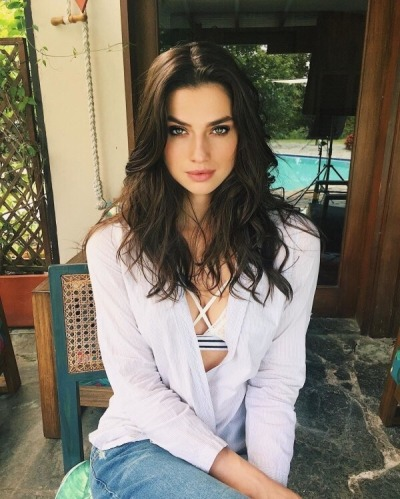

In [53]:
from IPython.display import Image
Image(filename='testt/nicole.jpg',width=300,height=200)

In [0]:
preprocessed_image=prepare_image('nicole.jpg')

In [0]:
predictions=model.predict(preprocessed_image)

In [60]:
print(predictions)
if predictions[0][0]>0.5:
  print("fake")
else:
  print("real")

[[0.05320705 0.9467929 ]]
real


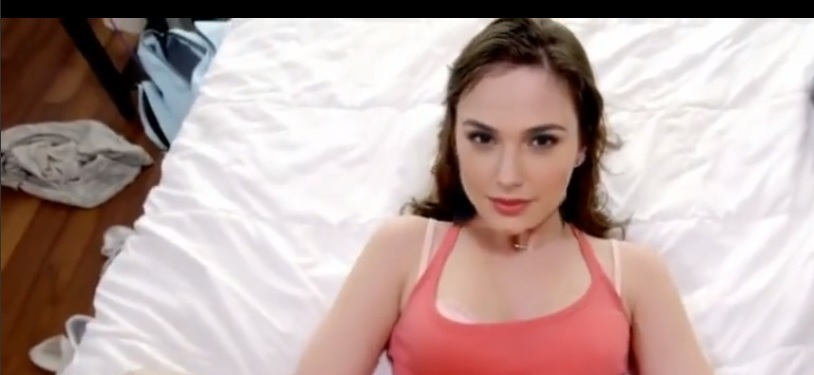

In [61]:
from IPython.display import Image
Image(filename='testt/gdot.jpg',width=300,height=200)

In [0]:
preprocessed_image=prepare_image('gdot.jpg')

In [0]:
predictions=model.predict(preprocessed_image)

In [65]:
print(predictions)
if predictions[0][0]>0.5:
  print("fake")
else:
  print("real")

[[0.61048746 0.38951254]]
fake


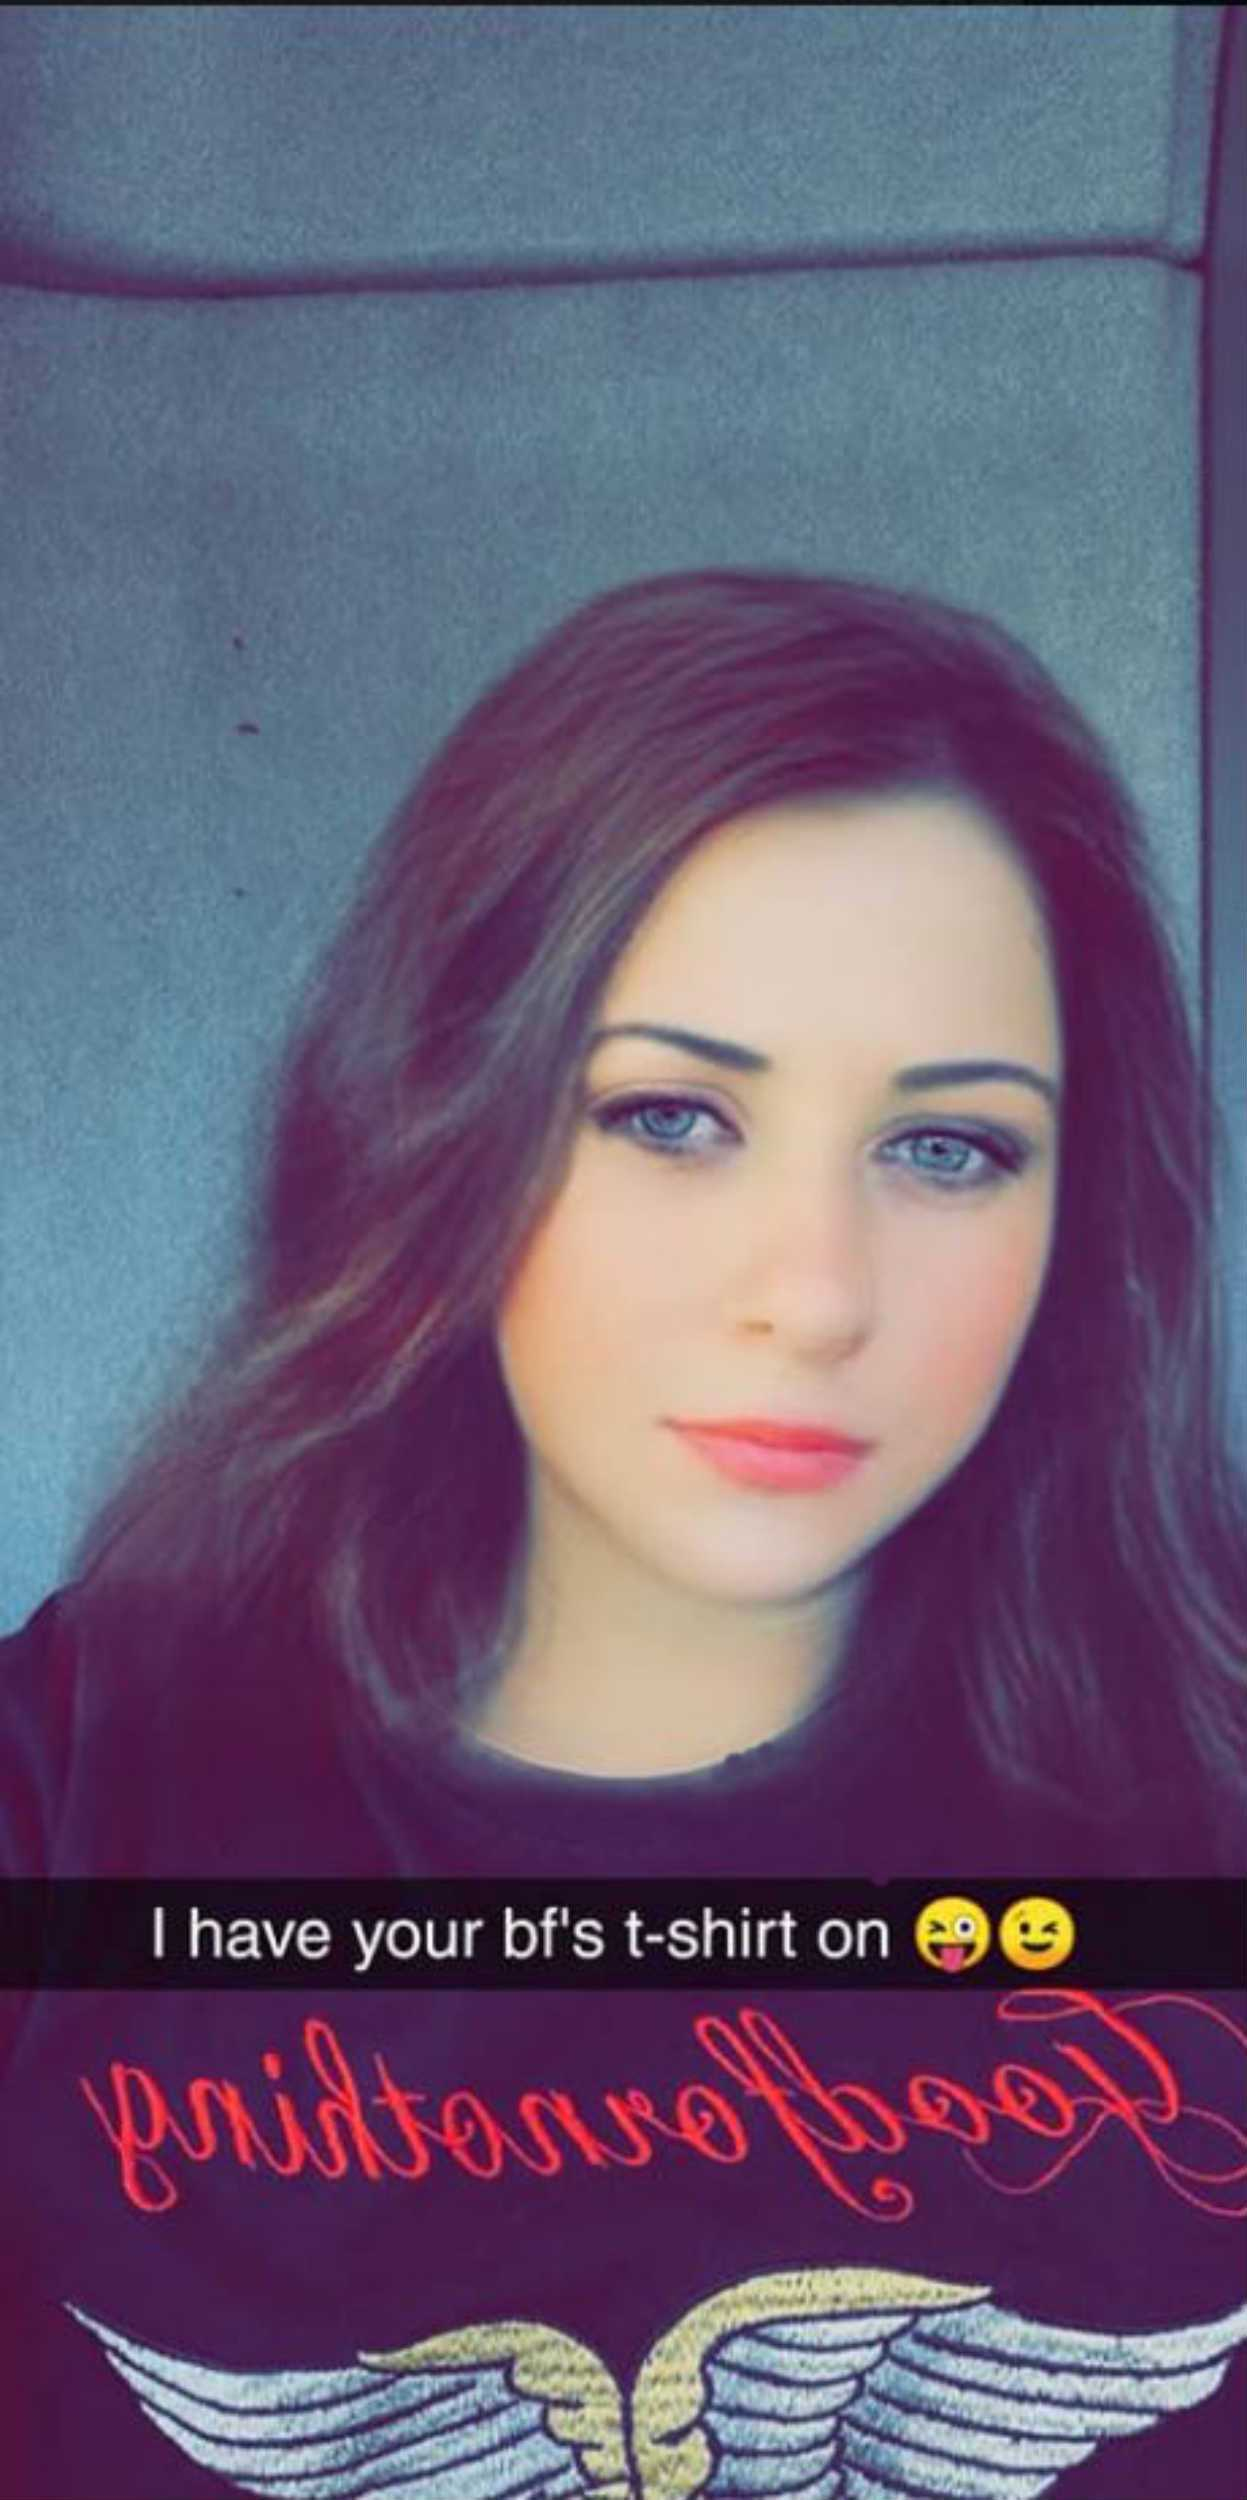

In [73]:
from IPython.display import Image
Image(filename='testt/snapch.jpg',width=300,height=200)



In [0]:
preprocessed_image=prepare_image('snapch.jpg')


In [0]:
predictions=model.predict(preprocessed_image)

In [76]:
print(predictions)
if predictions[0][0]>0.5:
  print("fake")
else:
  print("real")

[[0.57419854 0.4258014 ]]
fake


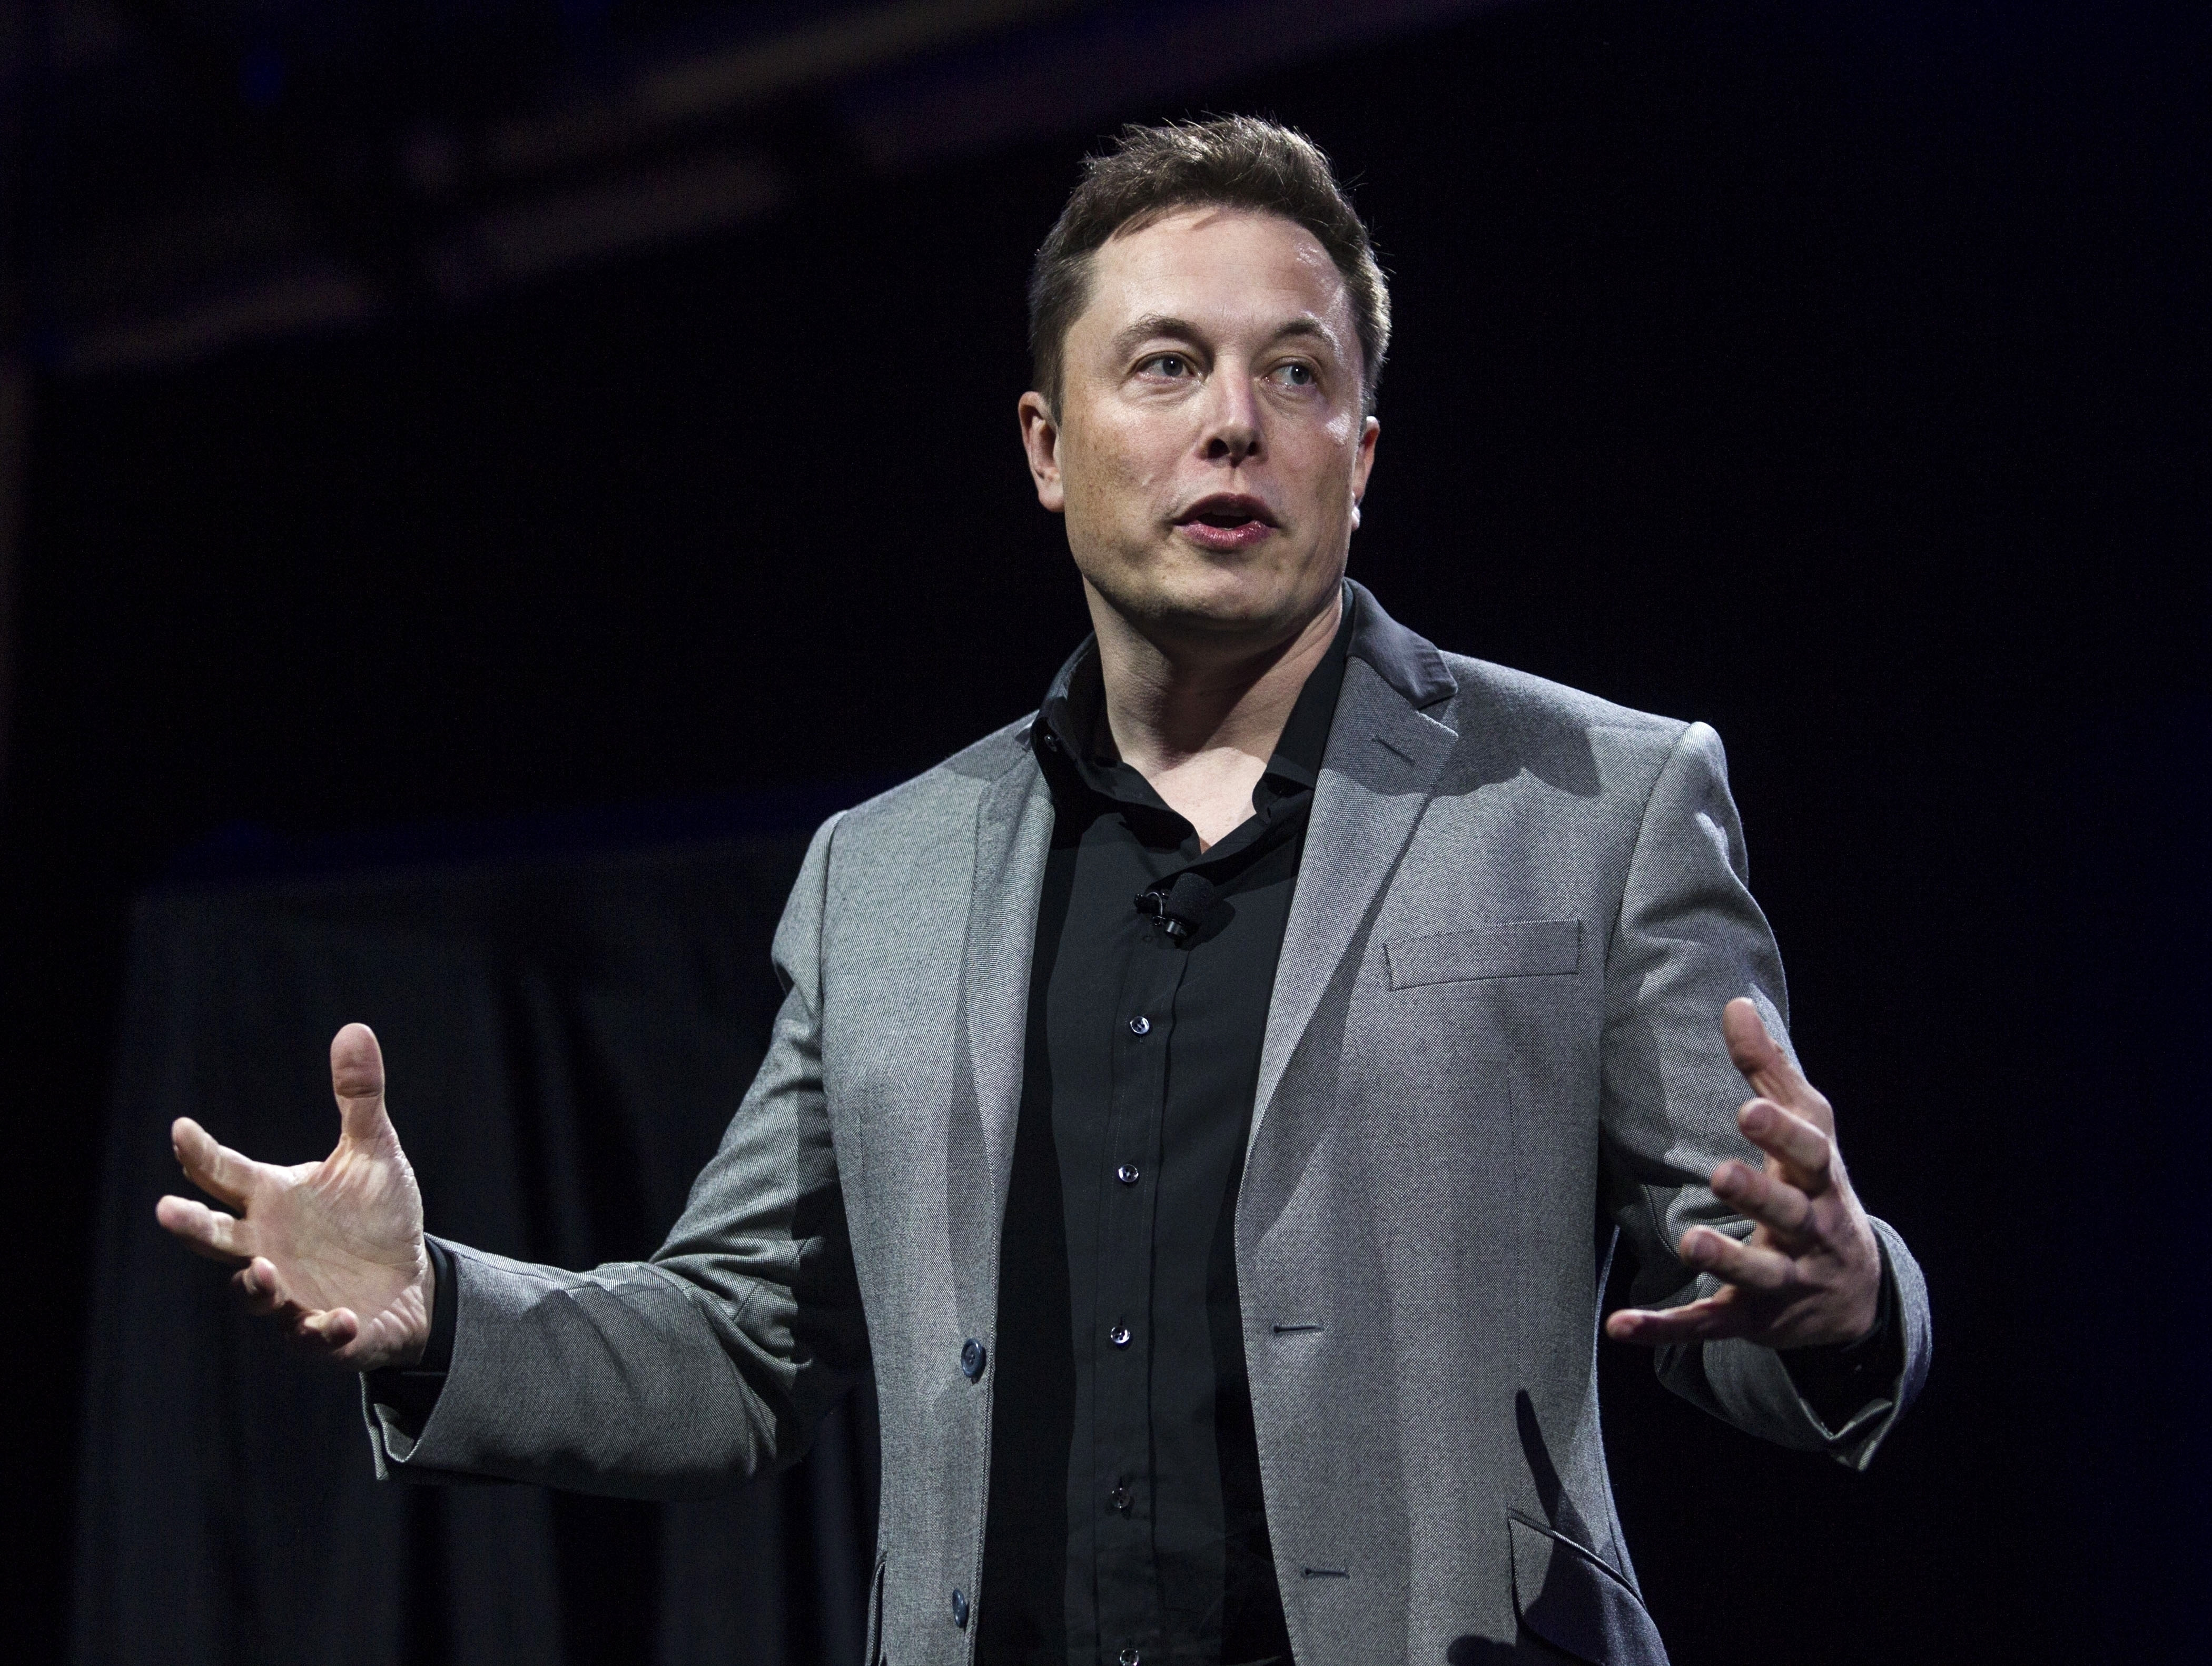

In [97]:
from IPython.display import Image
Image(filename='testt/elon1.jpg',width=300,height=200)


In [0]:
preprocessed_image=prepare_image('elon1.jpg')


In [0]:
predictions=model.predict(preprocessed_image)

In [100]:
print(predictions)
if predictions[0][0]>0.5:
  print("fake")
else:
  print("real")


[[0.42487255 0.5751275 ]]
real


In [0]:
model.save("modeld.h5")